25223


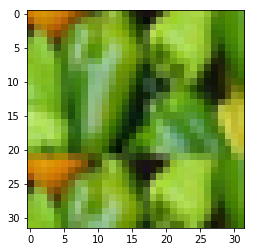

In [3]:
%matplotlib inline
import json
import base64
import imageio
import matplotlib.pyplot as plt
import numpy as np
import reqd

rimgs, rpreds, roids = reqd.load()
plt.imshow(rimgs[0])

print(len(rimgs))

In [4]:
%matplotlib inline
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
cimgs = np.concatenate((x_train,x_test))
clbls = np.concatenate((y_train,y_test))
print(len(cimgs))

Using TensorFlow backend.


169017344/169001437 [==============================] - 102s 1us/step
60000


In [5]:
rhashes = []
for i in range(0,len(rimgs)):
    rhashes.append(hash(tuple(rimgs[i].flatten())))
    
chashes = []
for i in range(0,len(cimgs)):
    chashes.append(hash(tuple(cimgs[i].flatten())))

In [6]:
%matplotlib inline

mp = {}

for i in range(0,len(rimgs)):
    #print(i)
    r = rimgs[i]
    found = False
    for j in range(0,len(cimgs)):
        c = cimgs[j]
        #plt.imshow(c)
        if rhashes[i] == chashes[j] and np.array_equal(r,c):
            mp[i] = j
            found=True
            break
    if not found:
        print(i)
        print("not found")
        plt.imshow(r)
        plt.show()
        break

print(len(mp))

25223


In [7]:
#cross entropy loss is the goal, so shouldn’t we maximise that?
import math
scrs = []
acc = []
def cross_entropy(y,y_hat):
    #print(y)
    #print(y_hat)
    return -sum(map( (lambda a,b: a*math.log(b+1e-15)),y,y_hat))
for i in range(0,len(rimgs)):
    pred = rpreds[i]
    label = clbls[mp[i]][0]
    tgt = np.zeros(100)
    tgt[label] = 1.0
    scrs.append(cross_entropy(tgt,pred))
    #print(label)
    acc.append(pred[label])


0.5750515715577238
1.0


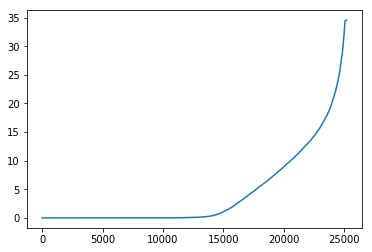

In [8]:
srted=sorted(range(0,len(rimgs)), key=lambda x: scrs[x])
print(np.average(acc))
print(acc[srted[1000]])
plt.plot(list(map(lambda x:scrs[x],srted)))

In [11]:
import random

nums = list(map(lambda x: roids[x], srted[3500:4500]))
#print(nums)
sample = random.sample(nums,1000)
res = ','.join(sample)
with open('outjohn.csv', 'w') as f:
    f.write(res)